In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# prepare database to connect
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# Create base
Base = automap_base()
# Code for table schema
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# save referencees to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [15]:
[column.key for column in Measurement.__table__.rows]

AttributeError: 'Table' object has no attribute 'rows'

# Exploratory Climate Analysis

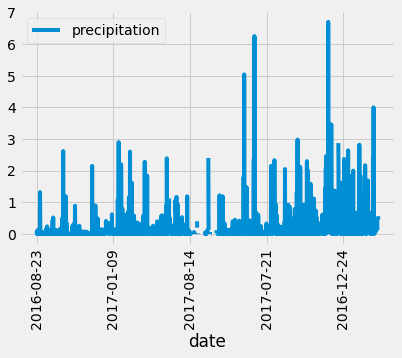

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
#with index
#print(df)
# without index
# convert the DataFrame to strings, and then set our index to "False' to conver to string
# print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation = 90)
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# How many stations are available in this dataset?
# add the starting point for our query
# get nuber of station
# session.query(func.count(Station.station))

session.query(func.count(Station.station)).all()[0][0]

9

In [17]:
# What are the most active stations?
# List the stations and the counts in descending order.
# list stations and counts
# use gorupby()
# use orderby() 
# ad all()
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# add filter
# add all
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [ ]:
# Choose the station with the highest number of temperature observations.
#Add filter for sttaion
# add filter for recent year
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
# print statement
# print(results)
# convert to df
df = pd.DataFrame(results,columns=['tobs'])
# set index
df.reset_index(drop=True, inplace=True)
# print statement
print(df)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# compress x axis to fit in box plot
df.plot.hist(bins=12)
plt.title('Temperature 2017\n Station:"USC00519281"')
plt.xlabel('Temperature in Degrees(F)')
plt.show()


     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


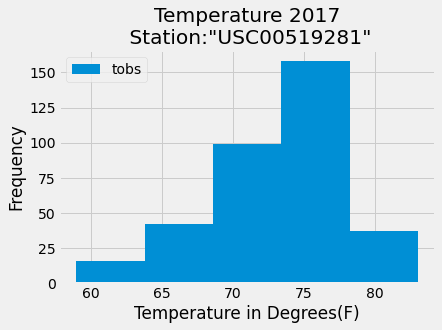

In [19]:
# Choose the station with the highest number of temperature observations.
#Add filter for sttaion
# add filter for recent year
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
# print statement
# print(results)
# convert to df
df = pd.DataFrame(results,columns=['tobs'])
# set index
df.reset_index(drop=True, inplace=True)
# print statement
print(df)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# compress x axis to fit in box plot
df.plot.hist(bins=5)
plt.title('Temperature 2017\n Station:"USC00519281"')
plt.xlabel('Temperature in Degrees(F)')
plt.show()

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


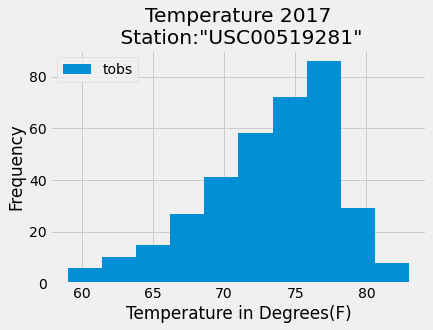

In [20]:
# Choose the station with the highest number of temperature observations.
#Add filter for sttaion
# add filter for recent year
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
# print statement
# print(results)
# convert to df
df = pd.DataFrame(results,columns=['tobs'])
# set index
df.reset_index(drop=True, inplace=True)
# print statement
print(df)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# compress x axis to fit in box plot
df.plot.hist(bins=10)
plt.title('Temperature 2017\n Station:"USC00519281"')
plt.xlabel('Temperature in Degrees(F)')
plt.show()

In [27]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.date < end_date).filter(Measurement.date > start_date).all()
    return results

In [28]:
sdate = dt.date(2016, 8, 23)
edate = dt.date(2017, 8, 23)

r = calc_temps(sdate, edate)

In [29]:
print(r)

[(58.0, 87.0, 74.56872465074358)]


# Challenge